Задача 1. Численное решение нелинейных уравнений.

In [56]:
import matplotlib.pyplot as plt
from typing import Union, List
import numpy as np

In [57]:
def f(x: Union[int, float]) -> float:
    return x**3 - 6*x**2 + 5*x

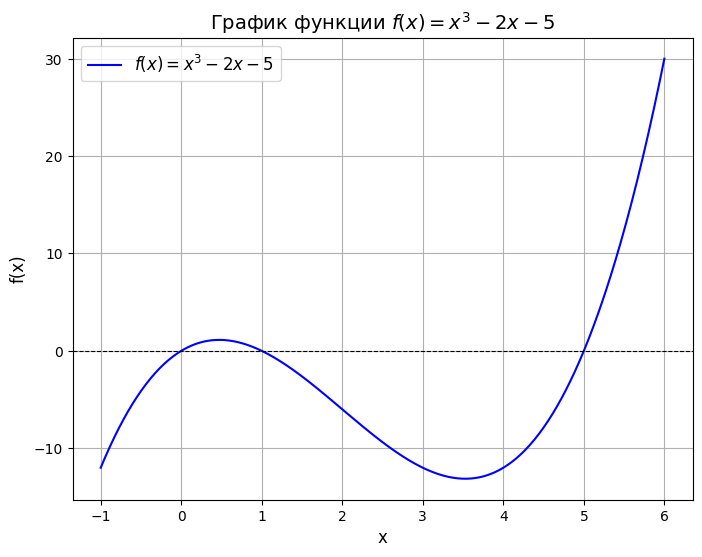

In [58]:
x_values = np.linspace(-1, 6, 500)
y_values = f(x_values)

plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label="$f(x) = x^3 - 2x - 5$", color="blue")

plt.axhline(0, color="black", linewidth=0.8, linestyle="--")

plt.title("График функции $f(x) = x^3 - 2x - 5$", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("f(x)", fontsize=12)
plt.grid(True)

plt.legend(fontsize=12)

plt.show()

In [59]:
def df(x: Union[int, float]) -> float:
    return 3*x**2 - 12*x + 5

In [60]:
def bisection_method(left, right, epsilon):
    count_of_iterations = 0
    while (abs(right - left) > 2* epsilon):
        mid = (right + left)/2

        if (f(left) * f(mid) < 0):
            right = mid
        else:
            left = mid

        count_of_iterations += 1
    return count_of_iterations

In [61]:
def method_of_chord(lower, upper, epsilon):
    iteration = 0

    while True:
        # Проверка на деление на ноль
        if f(upper) == f(lower):
            # Сдвигаем границы интервала для избежания деления на ноль
            lower += epsilon
            upper -= epsilon
            continue

        # Вычисление нового приближения
        current = lower - f(lower) * (upper - lower) / (f(upper) - f(lower))

        # Условие выхода из цикла
        if abs(f(current)) < epsilon:
            return iteration

        # Обновление границ интервала
        if np.sign(f(lower)) != np.sign(f(current)):
            upper = current
        else:
            lower = current

        iteration += 1

In [62]:
def newton_method_with_safety(x0, epsilon):
    x_curr = x0
    iter_count = 0

    while True:
        if df(x_curr) == 0:
            raise ValueError("Производная равна нулю. Метод Ньютона не может быть применён.")
        
        x_next = x_curr - f(x_curr) / df(x_curr)
        iter_count += 1

        diff = abs(x_next - x_curr)
        if diff < epsilon:
            return iter_count

        x_curr = x_next

In [63]:
def plot_iterations_vs_epsilon(method_func, left, right, epsilon_values, title, x0=None):
    iterations_counts = []
    for epsilon in epsilon_values:
        try:
            if x0 is not None:
                iterations = method_func(x0, epsilon)
            else:
                iterations = method_func(left, right, epsilon)
            iterations_counts.append(iterations)
        except ValueError as e:
            print(f"Пропущено значение epsilon={epsilon} из-за ошибки: {e}")
            iterations_counts.append(None)

    valid_epsilon_values = [eps for eps, it in zip(epsilon_values, iterations_counts) if it is not None]
    valid_iterations_counts = [it for it in iterations_counts if it is not None]

    return valid_epsilon_values, valid_iterations_counts

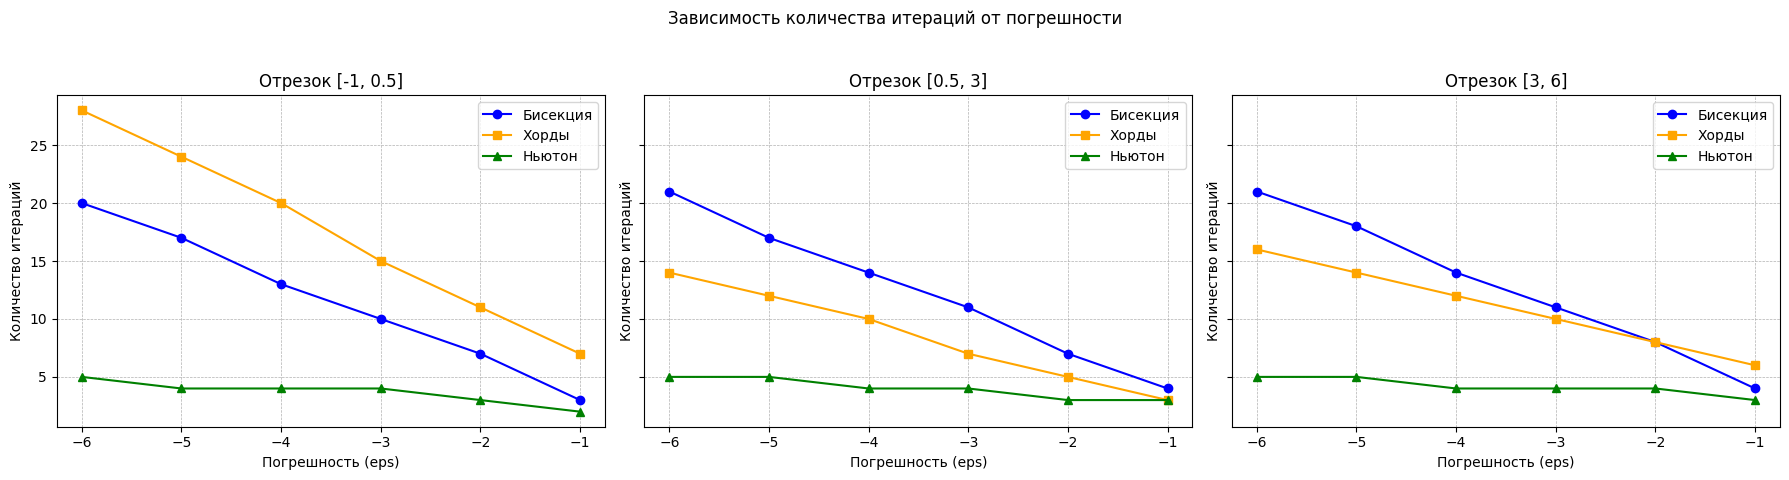

In [64]:
epsilon_values = [10**(-i) for i in range(1, 7)]  # Значения погрешности от 1e-1 до 1e-6
intervals = [(-1, 0.5), (0.5, 3), (3, 6)]  # Интервалы для корней

# Построение графиков для каждого интервала
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, (left, right) in enumerate(intervals):
    x0 = (left + right) / 2  # Начальное приближение для метода Ньютона

    # График для метода бисекции
    eps_bisect, iter_bisect = plot_iterations_vs_epsilon(bisection_method, left, right, epsilon_values, "Метод бисекции")
    axs[i].plot(np.log10(eps_bisect), iter_bisect, label="Бисекция", marker='o', linestyle='-', color='blue')

    # График для метода хорд
    eps_chord, iter_chord = plot_iterations_vs_epsilon(method_of_chord, left, right, epsilon_values, "Метод хорд")
    axs[i].plot(np.log10(eps_chord), iter_chord, label="Хорды", marker='s', linestyle='-', color='orange')

    # График для метода Ньютона
    eps_newton, iter_newton = plot_iterations_vs_epsilon(newton_method_with_safety, left, right, epsilon_values, "Метод Ньютона", x0=x0)
    axs[i].plot(np.log10(eps_newton), iter_newton, label="Ньютон", marker='^', linestyle='-', color='green')

    axs[i].set_title(f"Отрезок [{left}, {right}]")
    axs[i].set_xlabel("Погрешность (eps)")
    axs[i].set_ylabel("Количество итераций")
    axs[i].grid(True, which='both', linestyle='--', linewidth=0.5)
    axs[i].legend()

plt.suptitle("Зависимость количества итераций от погрешности")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()